In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import math

/home/ayush/python-env/py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


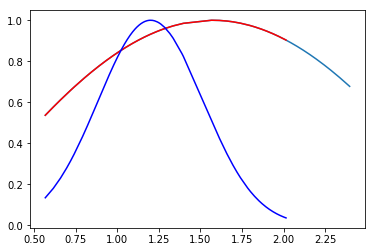

In [5]:
boston = load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
target = pd.DataFrame(boston.target,columns=['target'])
data = pd.concat([features,target],axis=1)
x=data['RM']
X1 = sorted(np.array(x/x.mean()))
X=X1 + [i+1 for i in X1]

Y=np.sin(X)
plt.plot(X,Y)
n = int(0.8 * len(X))

x_train = X[:n]
y_train = Y[:n]

x_test = X[n:]
y_test = Y[n:]

w = np.exp([-(1.2-i)**2/(2*0.1) for i in x_train])
plt.plot(x_train,y_train,'r')
plt.plot(x_train,w,'b')

def h(x,a,b):
    return a*x +b

def error(a,x,b,y,w):
    e=0
    m=len(x)
    for i in range(m):
        e +=np.power(h(x[i],a,b)-y[i],2)*w[i]
    return (1/(2*m))*e



In [22]:
def step_gradient(a,x,b,y,l_rate,w):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
        grad_a += (2/m)*((h(x[i],a,b)-y[i])*x[i])*w[i]
        grad_b += (2/m)*(h(x[i],a,b)-y[i])*w[i]
    a=a-(grad_a * l_rate)
    b=b-(grad_b * l_rate)
    return a,b

def descend(initial_a,initial_b,x,y,l_rate,iterations,w):
    a=initial_a
    b=initial_b
    for i in range(iterations):
        e=error(a,x,b,y,w)
        if i%1000==0:
            print("Error: "+str(e)+"---a:"+str(a)+",b:"+str(b))
        a,b = step_gradient(a,x,b,y,l_rate,w)
    return a,b

Error: 0.06614137226206705---a:1.8600662368042573,b:-0.7962243178421666
Error: 0.018312489887152176---a:1.3533605603913987,b:-0.620673567323427
Error: 0.011422762970211438---a:1.1032234861838663,b:-0.3475908149085799
Error: 0.007176247674245257---a:0.9068452261130027,b:-0.1331983025076317
Error: 0.00455888817999083---a:0.752672074634729,b:0.03511752470395232
Error: 0.0029456664570710676---a:0.6316334187867482,b:0.16725934893397798
Error: 0.0019513497294632823---a:0.5366080783236878,b:0.2710015934995398
Error: 0.0013384979802249575---a:0.46200533867114607,b:0.35244782273250447
Error: 0.0009607639482851539---a:0.4034360271954509,b:0.4163898386783469
Error: 0.0007279458172072354---a:0.3574542809122215,b:0.46658960165968305


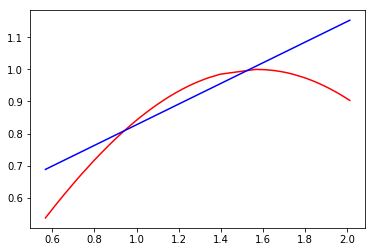

In [23]:
a=1.8600662368042573
b=-0.7962243178421666
l_rate = 0.01
iterations = 10000
final_a,final_b = descend(a,b,x_train,y_train,l_rate,iterations,w)
H=[i*final_a + final_b for i in x_train]
plt.plot(x_train,y_train,'r',x_train,H,'b')